1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

## Load Dataset

In [133]:
import pandas as pd
PATH = "C:/Users/lecon/OneDrive - VNU-HCMUS/HK2_2023-2024/MachineLearning/Lab_ML/Week2/heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1


## Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, classification_report

In [135]:
def changing_columns_name(df: pd.DataFrame) -> pd.DataFrame:
    return df.rename(columns={
        'cp': 'angina',
        'trestbps': 'systolic',
        'chol': 'cholesterol',
        'fbs': 'diabetes',
        'restecg': 'electrocardiogram',
        'thalach': 'max_heart_rate',
        'exang': 'exercise_induced_angina',
        'oldpeak': 'ST_depression',
        'slope': 'ST_slope',
        'ca': 'number_of_major_vessels',
        'thal': 'thalassemia',
        'target': 'heart_disease'
    })

In [136]:
def changing_data_types(df: pd.DataFrame) -> pd.DataFrame:
    return df.astype({
        'age': 'int64',
        'sex': 'bool',
        'angina': 'int64',
        'systolic': 'int64',
        'cholesterol': 'int64',
        'diabetes': 'bool',
        'electrocardiogram': 'int64',
        'max_heart_rate': 'int64',
        'exercise_induced_angina': 'bool',
        'ST_depression': 'float32',
        'ST_slope': 'int64',
        'number_of_major_vessels': 'int64',
        'thalassemia': 'int64',
        'heart_disease': 'bool'
    })

In [137]:
def preprocessing_data(df: pd.DataFrame) -> pd.DataFrame:
    df = changing_columns_name(df)
    df = changing_data_types(df)

    return df

df = preprocessing_data(df)
df.head()

,age,sex,angina,systolic,cholesterol,diabetes,electrocardiogram,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,number_of_major_vessels,thalassemia,heart_disease
0,46,True,0,120,249,False,0,144,False,0.8,2,0,3,False
1,71,False,1,160,302,False,1,162,False,0.4,2,2,2,True
2,71,False,1,160,303,False,1,163,False,0.4,2,2,2,True
3,71,False,1,160,304,False,1,164,False,0.4,2,2,2,True
4,71,False,1,160,305,False,1,165,False,0.4,2,2,2,True


## Data Analysis


Information about dataset after preprocessing


Information about the dataset after preprocessing:
* **age**: Patient’s Age in years.
* **sex**: Patient's gender. (0=Male, 1=Female).
* **angina**: Chest Pain type.(4 levels: 0, 1, 2, 3, 4) corresponding to (4 values: ATA, NAP, ASY, TA).
* **systolic**:  Patient's resting blood pressure (mm Hg on admission to the hospital).
* **cholesterol**: Patient's cholesterol measurement in mg/dl.
* **diabets**: If the patient's has diabets (0:False, 1:True).
* **electrocardiogram**: resting Electroencephalographic result (0: Normal, 1: ST-T Wave Abnormality, 2: Left Ventricular Hypertrophy).
* **max_heart_rate**: Patient's maximum heart rate achieved.
* **exercise_included_angina**: Excercise included Angina (0:No, 1:Yes).
* **ST_depression**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
* **ST_slope**: The slope of the peak exercise ST segment (0: Upsloping, 1: Flatsloping, 2: Downsloping)
* **number_of_major_vessels**: The number of major vessels (0-3)
* **thalassemia** - A blood disorder called thalassemia (0: Normal, 1: Fixed Defect, 2: Reversible Defect)
* **heart_disease** - Heart disease (0: No, 1: Yes)




In [138]:
df.head()

,age,sex,angina,systolic,cholesterol,diabetes,electrocardiogram,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,number_of_major_vessels,thalassemia,heart_disease
0,46,True,0,120,249,False,0,144,False,0.8,2,0,3,False
1,71,False,1,160,302,False,1,162,False,0.4,2,2,2,True
2,71,False,1,160,303,False,1,163,False,0.4,2,2,2,True
3,71,False,1,160,304,False,1,164,False,0.4,2,2,2,True
4,71,False,1,160,305,False,1,165,False,0.4,2,2,2,True


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      886 non-null    int64  
 1   sex                      886 non-null    bool   
 2   angina                   886 non-null    int64  
 3   systolic                 886 non-null    int64  
 4   cholesterol              886 non-null    int64  
 5   diabetes                 886 non-null    bool   
 6   electrocardiogram        886 non-null    int64  
 7   max_heart_rate           886 non-null    int64  
 8   exercise_induced_angina  886 non-null    bool   
 9   ST_depression            886 non-null    float32
 10  ST_slope                 886 non-null    int64  
 11  number_of_major_vessels  886 non-null    int64  
 12  thalassemia              886 non-null    int64  
 13  heart_disease            886 non-null    bool   
dtypes: bool(4), float32(1), in

In [140]:
def divided_age_bin(df: pd.DataFrame) -> pd.DataFrame:
    bins = np.linspace(df['age'].min(), df['age'].max(), 7) 
    labels = ['29-37', '38-45', '46-53', '54-61', '62-69', '70-77']
    df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)

    return df

df1 = divided_age_bin(df.copy())
df1.head()

,age,sex,angina,systolic,cholesterol,diabetes,electrocardiogram,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,number_of_major_vessels,thalassemia,heart_disease,age_binned
0,46,True,0,120,249,False,0,144,False,0.8,2,0,3,False,46-53
1,71,False,1,160,302,False,1,162,False,0.4,2,2,2,True,70-77
2,71,False,1,160,303,False,1,163,False,0.4,2,2,2,True,70-77
3,71,False,1,160,304,False,1,164,False,0.4,2,2,2,True,70-77
4,71,False,1,160,305,False,1,165,False,0.4,2,2,2,True,70-77


In [141]:
# change value of categorical data
def change_categorical_data(df: pd.DataFrame) -> pd.DataFrame:
    df.angina = df.angina.map({
        0: 'TA',
        1: 'ATA',
        2: 'NAP',
        3: 'ASY'
    }).astype('category')
    df.electrocardiogram = df.electrocardiogram.map({
        0: 'N',
        1: 'ST-T',
        2: 'LVH'
    }).astype('category')
    df.ST_slope = df.ST_slope.map({
        0: 'UP',
        1: 'FLAT',
        2: 'DOWN'
    }).astype('category')
    df.thalassemia = df.thalassemia.map({
        0: 'N',
        1: 'FD',
        2: 'RD'
    }).astype('category')

    return df

df1 = change_categorical_data(df1)
df1.head()

,age,sex,angina,systolic,cholesterol,diabetes,electrocardiogram,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,number_of_major_vessels,thalassemia,heart_disease,age_binned
0,46,True,TA,120,249,False,N,144,False,0.8,DOWN,0,NaN,False,46-53
1,71,False,ATA,160,302,False,ST-T,162,False,0.4,DOWN,2,RD,True,70-77
2,71,False,ATA,160,303,False,ST-T,163,False,0.4,DOWN,2,RD,True,70-77
3,71,False,ATA,160,304,False,ST-T,164,False,0.4,DOWN,2,RD,True,70-77
4,71,False,ATA,160,305,False,ST-T,165,False,0.4,DOWN,2,RD,True,70-77


In [142]:
num = df1.select_dtypes(include='number')
cat = df1.select_dtypes(exclude='number')

In [143]:
num.head()

,age,systolic,cholesterol,max_heart_rate,ST_depression,number_of_major_vessels
0,46,120,249,144,0.8,0
1,71,160,302,162,0.4,2
2,71,160,303,163,0.4,2
3,71,160,304,164,0.4,2
4,71,160,305,165,0.4,2


In [144]:
cat.head()

,sex,angina,diabetes,electrocardiogram,exercise_induced_angina,ST_slope,thalassemia,heart_disease,age_binned
0,True,TA,False,N,False,DOWN,NaN,False,46-53
1,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
2,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
3,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
4,False,ATA,False,ST-T,False,DOWN,RD,True,70-77


Plot the distribution of numerical features

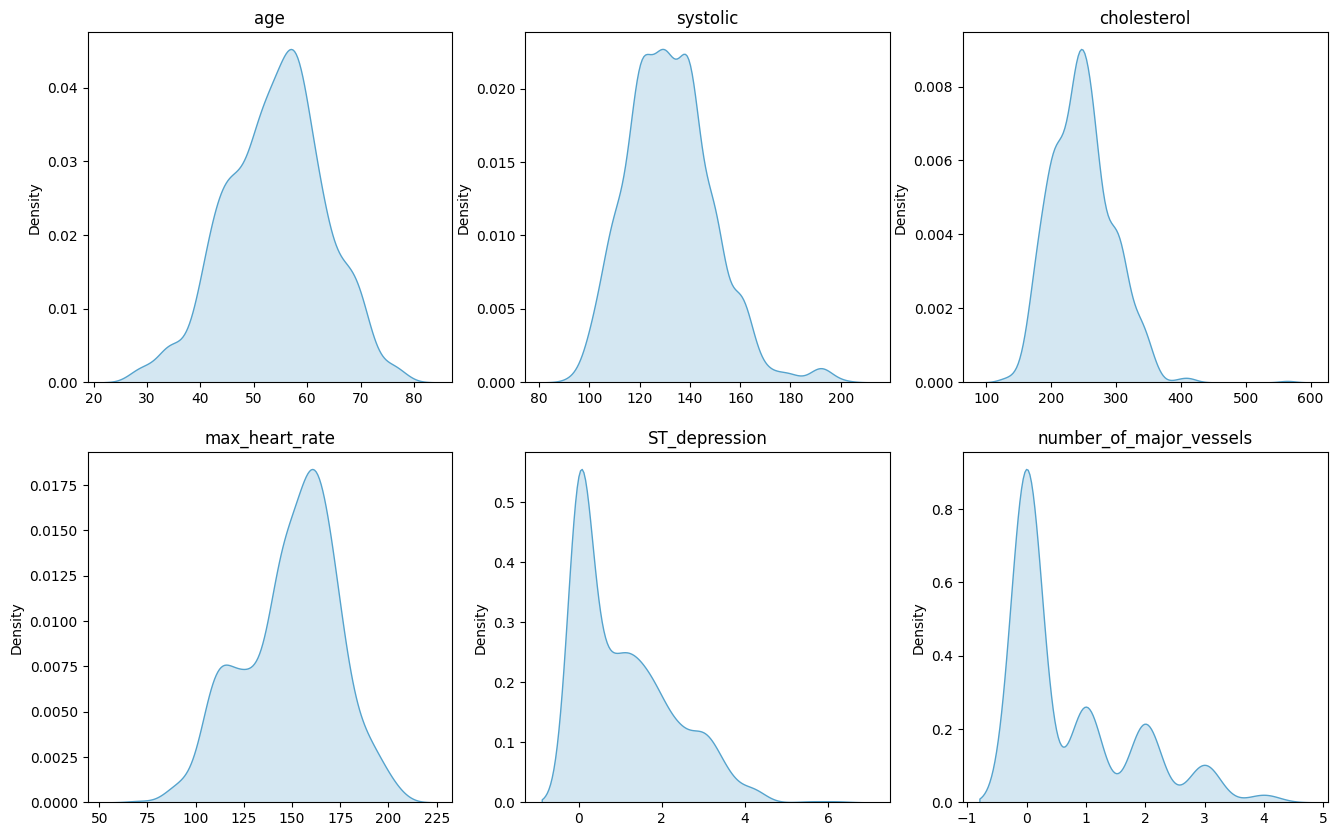

In [145]:
def plot_num_distribution(df: pd.DataFrame) -> None:
    sns.set_palette('icefire')
    
    fig, axes = plt.subplots(2,3, figsize=(16,10))
    for col, ax in zip(df.columns, axes.flatten()):
        sns.kdeplot(df[col], fill=True, ax=ax)
        ax.set_xlabel('')
        ax.set_title(col)

    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

plot_num_distribution(num)


Basis statistics with numerical columns

In [146]:
def basic_statistics(df: pd.DataFrame):
    return df.describe().T

basic_statistics(num)

,count,mean,std,min,25%,50%,75%,max
age,886.0,54.007901,9.126292,29.0,47.0,54.0,60.0,77.0
systolic,886.0,132.117381,16.807511,94.0,120.0,130.0,140.0,200.0
cholesterol,886.0,247.497743,47.209995,126.0,212.0,245.0,274.0,564.0
max_heart_rate,886.0,149.492099,23.921327,71.0,133.0,153.0,166.0,206.0
ST_depression,886.0,1.083296,1.147935,0.0,0.0,0.8,1.8,6.2
number_of_major_vessels,886.0,0.714447,1.028825,0.0,0.0,0.0,1.0,4.0


Visualize boxplot to capture outliers

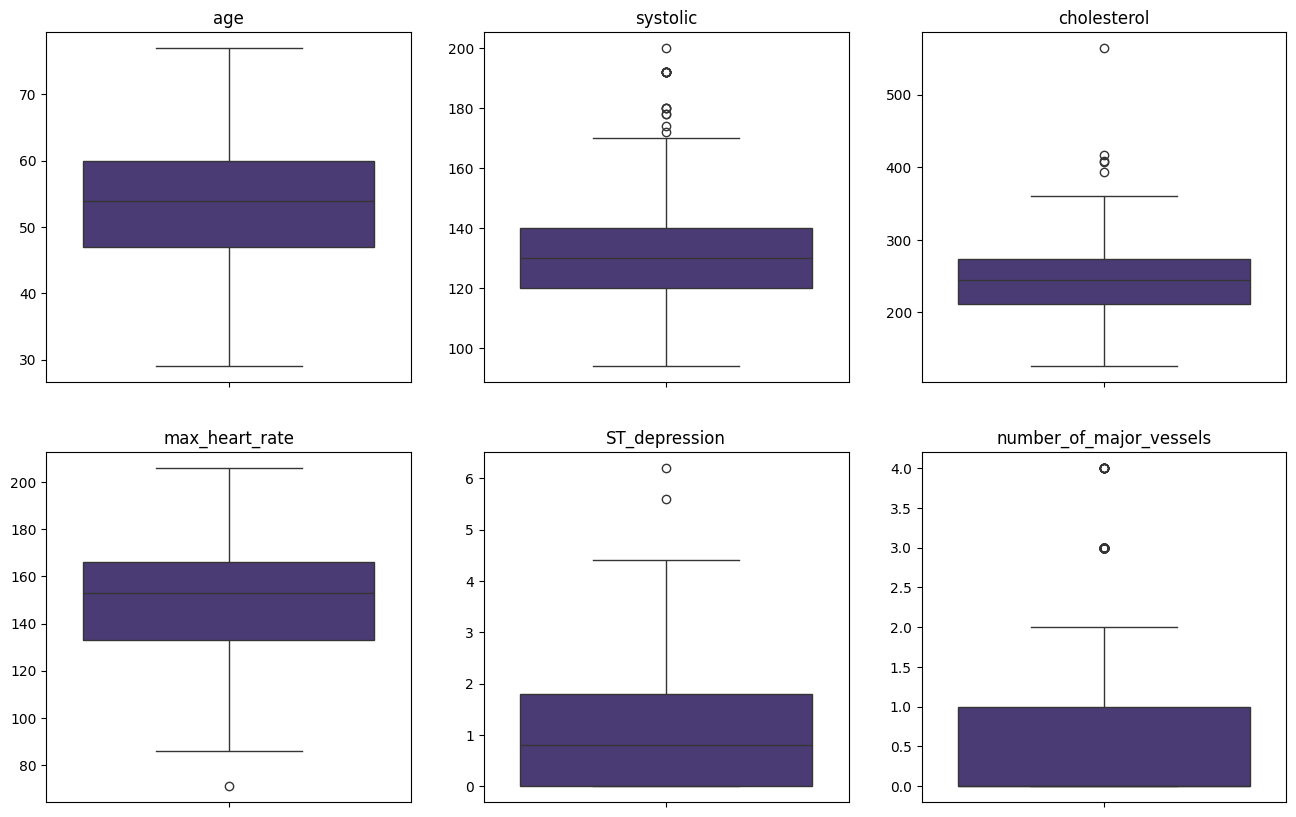

In [147]:
def plot_statitics(df: pd.DataFrame) -> None:
    sns.set_palette('viridis')
    fig, axes = plt.subplots(2,3,figsize=(16,10))

    for col, ax in zip(df.columns, axes.flatten()):
        sns.boxplot(df[col], ax=ax)
        ax.set_title(col)
        ax.set_ylabel('')
    plt.show()

plot_statitics(num)

In [148]:
def number_of_outliers(df: pd.DataFrame):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    return ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).sum()

number_of_outliers(num)

age                         0
systolic                   17
cholesterol                 5
max_heart_rate              1
ST_depression               2
number_of_major_vessels    72
dtype: int64

Plot the correlation between the features

In [149]:
df1.head()

,age,sex,angina,systolic,cholesterol,diabetes,electrocardiogram,max_heart_rate,exercise_induced_angina,ST_depression,ST_slope,number_of_major_vessels,thalassemia,heart_disease,age_binned
0,46,True,TA,120,249,False,N,144,False,0.8,DOWN,0,NaN,False,46-53
1,71,False,ATA,160,302,False,ST-T,162,False,0.4,DOWN,2,RD,True,70-77
2,71,False,ATA,160,303,False,ST-T,163,False,0.4,DOWN,2,RD,True,70-77
3,71,False,ATA,160,304,False,ST-T,164,False,0.4,DOWN,2,RD,True,70-77
4,71,False,ATA,160,305,False,ST-T,165,False,0.4,DOWN,2,RD,True,70-77


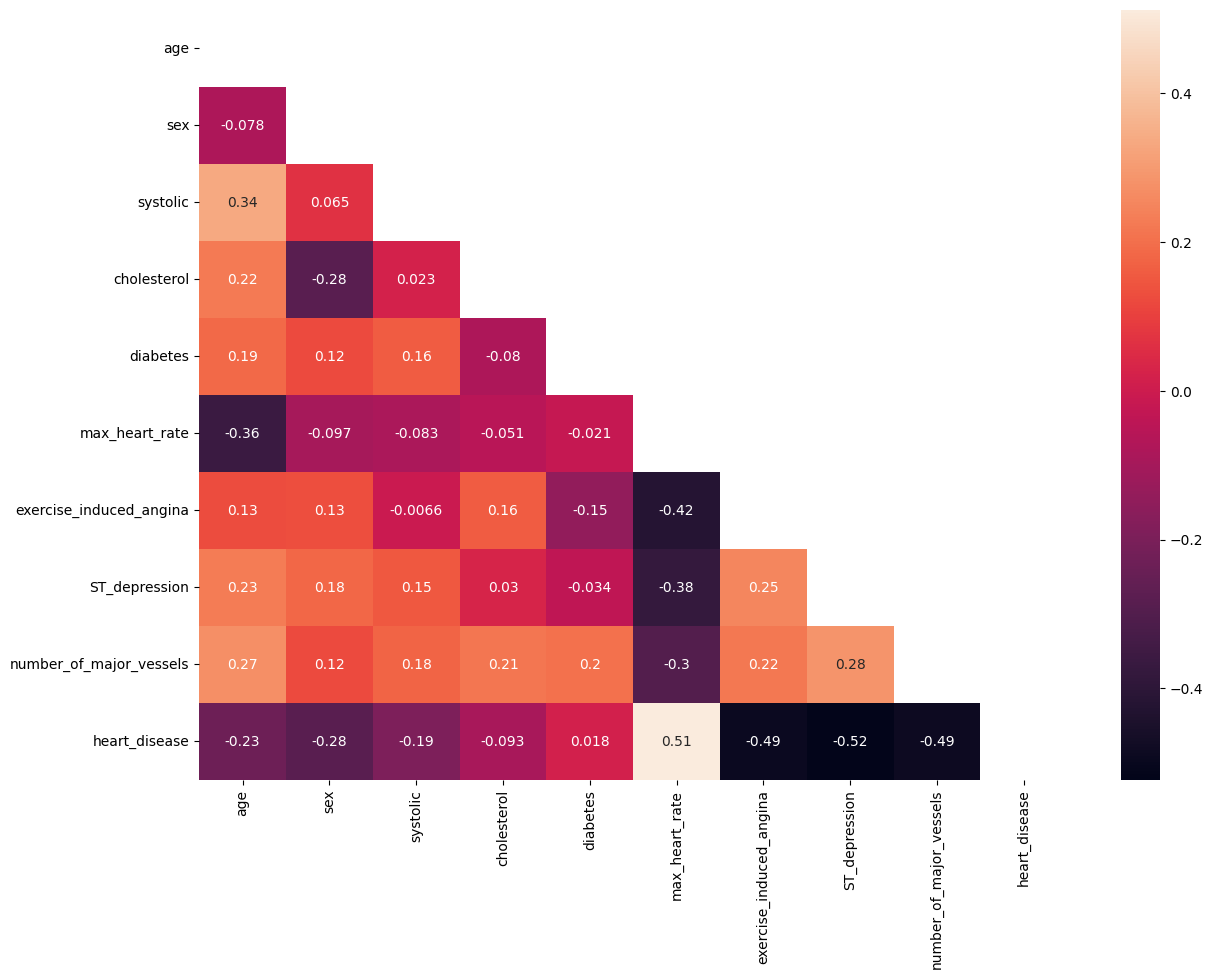

In [150]:
def plot_corr(df: pd.DataFrame) -> None:
    df = df.astype({col: 'int64' for col in df.select_dtypes(exclude='category').columns})
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(14,10))
    triangle_up = np.triu(np.ones_like(corr))
    sns.heatmap(corr, annot=True, mask=triangle_up, ax=ax)
    plt.show()

plot_corr(df1.select_dtypes(exclude='category'))

    

Plot categorical features

In [151]:
cat.head()

,sex,angina,diabetes,electrocardiogram,exercise_induced_angina,ST_slope,thalassemia,heart_disease,age_binned
0,True,TA,False,N,False,DOWN,NaN,False,46-53
1,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
2,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
3,False,ATA,False,ST-T,False,DOWN,RD,True,70-77
4,False,ATA,False,ST-T,False,DOWN,RD,True,70-77


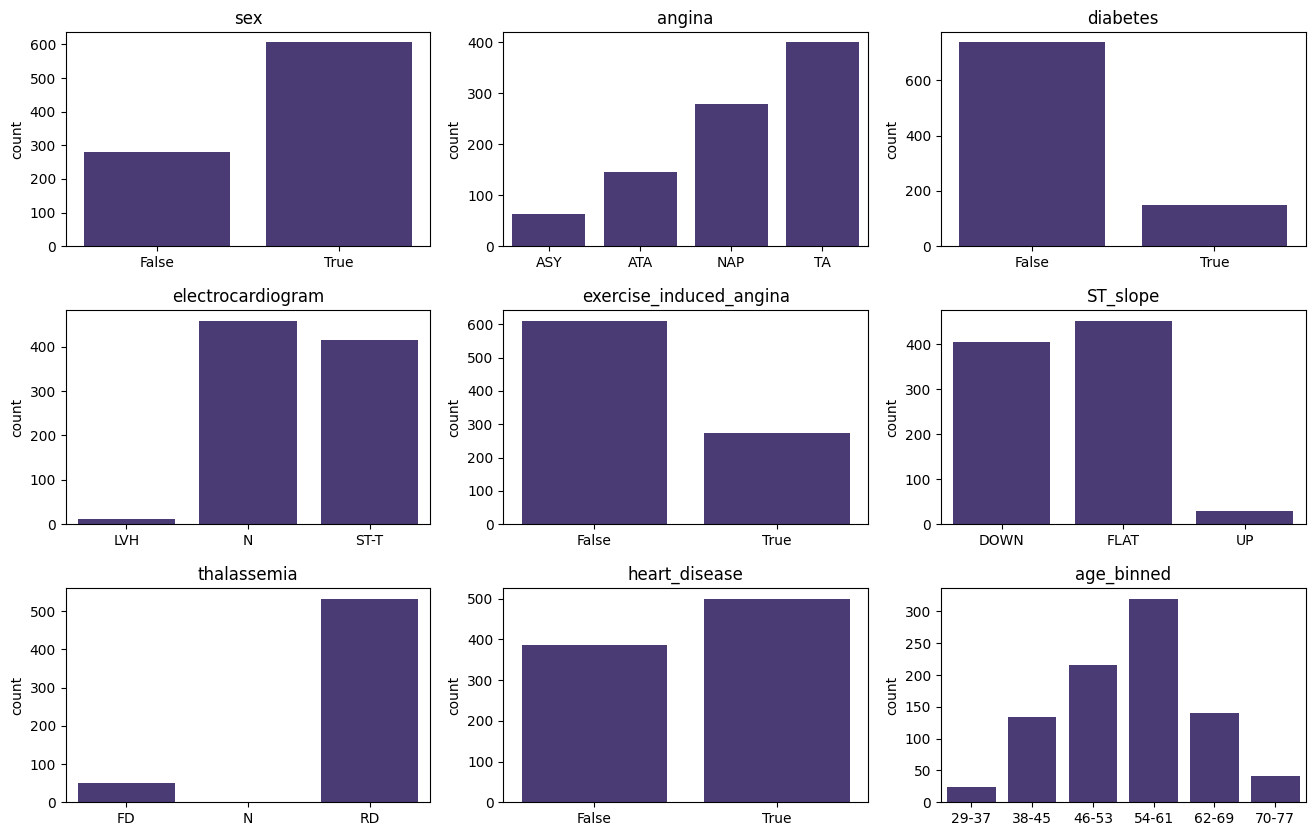

In [152]:
def plot_categorical(df: pd.DataFrame) -> None:
    sns.set_palette('viridis')

    fig, axes = plt.subplots(3,3,figsize=(16,10))

    for col, ax in zip(df.columns, axes.flatten()):
        sns.countplot(data=df, x=col, ax=ax)
        ax.set_title(col)
        ax.set_xlabel('')

    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    plt.show()

plot_categorical(cat.copy())


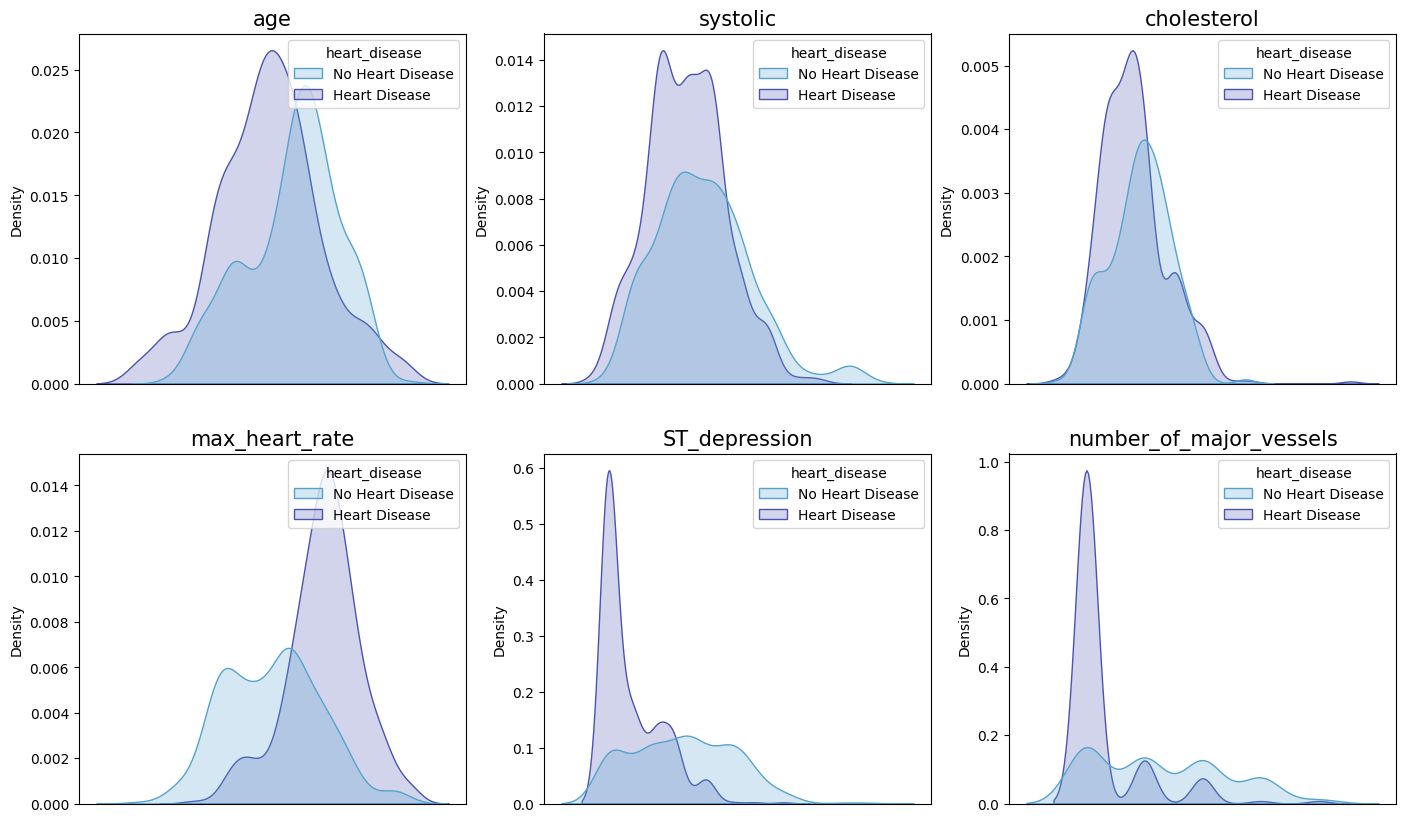

In [153]:
def plot_distribution_by_heart_disease(df: pd.DataFrame) -> None:
    df.heart_disease = df.heart_disease.map({True: 'Heart Disease', False: 'No Heart Disease'})

    sns.set_palette('icefire')
    fig, axes = plt.subplots(2, 3, figsize=(17, 10))

    for ax, col in zip(axes.flatten(), df.columns.delete(-1)):
        sns.kdeplot(data=df, x=col, hue='heart_disease', ax=ax, fill=True)
        ax.set_title(col, fontsize=15)
        ax.set_xlabel('')
        ax.set_xticks([])

    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()


plot_distribution_by_heart_disease(pd.concat([num, cat['heart_disease']], axis=1))

## Feature Engineering

In [154]:
ml = df1.drop(columns='age_binned')

In [155]:
def split_data(df: pd.DataFrame, test_size: float, random_state: int) -> tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    X = df.drop('heart_disease', axis=1)
    y = df['heart_disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

    return X, y, X_train, X_test, y_train, y_test

In [156]:
def create_logistic_regression_pipeline(features: pd.DataFrame) -> Pipeline:
    num_selector = make_column_selector(dtype_include='number')
    cat_selector = make_column_selector(dtype_exclude='number')

    num_cols = num_selector(features)
    cat_cols = cat_selector(features)

    num_preprocessor = StandardScaler()
    cat_preprocessor = OneHotEncoder()

    preprocessor = ColumnTransformer([
        ('StandardScaler', num_preprocessor, num_cols),
        ('OneHotEncoder', cat_preprocessor, cat_cols)
    ])

    return make_pipeline(preprocessor, LogisticRegression())

In [157]:
x, y, x_train, x_test, y_train, y_test = split_data(ml.copy(), 0.2, 1)
pipelines = create_logistic_regression_pipeline(x)

In [172]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, auc

def metrics_from_pipelines(logistic_regression_pipeline, x_train, y_train, x_test, y_test):
    logistic_regression_pipeline.fit(x_train, y_train)
    y_pred_test = logistic_regression_pipeline.predict(x_test)
    y_pred_train = logistic_regression_pipeline.predict(x_train)

    y_probs_test = logistic_regression_pipeline.predict_proba(x_test)[:, 1]
    y_probs_train = logistic_regression_pipeline.predict_proba(x_train)[:, 1]

    train_precisions, train_recalls, threshold = precision_recall_curve(y_train, y_probs_train)
    test_precisions, test_recalls, threshold = precision_recall_curve(y_test, y_probs_test)

    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    train_metrics = pd.DataFrame(
        {'accuracy_train': [accuracy_score(y_train, y_pred_train)],
         'f1_score_train': [f1_score(y_train, y_pred_train)],
         'precision_train': [precision_score(y_train, y_pred_train)],
         'recall_train': [recall_score(y_train, y_pred_train)],
         'specificity_train': [tn_train / (tn_train + fp_train)],
         'false_positive_rate_train': [fp_train / (fp_train + tn_train)],
         'false_negative_rate_train': [fn_train / (fn_train + tp_train)],
         })

    test_metrics = pd.DataFrame(
        {'accuracy_test': [accuracy_score(y_test, y_pred_test)],
         'f1_score_test': [f1_score(y_test, y_pred_test)],
         'precision_test': [precision_score(y_test, y_pred_test)],
         'recall_test': [recall_score(y_test, y_pred_test)],
         'specificity_test': [tn_test / (tn_test + fp_test)],
         'false_positive_rate_test': [fp_test / (fp_test + tn_test)],
         'false_negative_rate_test': [fn_test / (fn_test + tp_test)],
         })

    # Combine train and test metrics into one DataFrame
    return train_metrics, test_metrics
train_metrics, test_metrics,  = metrics_from_pipelines(pipelines, x_train, y_train, x_test, y_test)
display(train_metrics)
display(test_metrics)

,accuracy_train,f1_score_train,precision_train,recall_train,specificity_train,false_positive_rate_train,false_negative_rate_train
0,0.960452,0.965686,0.953995,0.977667,0.937705,0.062295,0.022333


,accuracy_test,f1_score_test,precision_test,recall_test,specificity_test,false_positive_rate_test,false_negative_rate_test
0,0.94382,0.948454,0.948454,0.948454,0.938272,0.061728,0.051546


In [3]:
X = pd.DataFrame({'city': ['London', 'London', 'Paris', 'Sallisaw'],
...                   'rating': [5, 3, 4, 5]})  
X

,city,rating
0,London,5
1,London,3
2,Paris,4
3,Sallisaw,5


In [7]:
num_selector = make_column_selector(dtype_include='number')
num_selector(X)

['rating']

In [34]:
cat_selector = make_column_selector(dtype_exclude='number')
cat_selector(X)

['city']

In [36]:
num_preprocessor = StandardScaler()
cat_preprocessor = OneHotEncoder()

In [35]:
cat_preprocessor.fit_transform(cat_selector(X))

ValueError: Expected 2D array, got 1D array instead:
array=['city'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
cat_preprocessor.categories_

[array(['London', 'Paris', 'Sallisaw'], dtype=object),
 array([3, 4, 5], dtype=int64)]

Employee data : 
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice
['Gender', 'Remarks']
[[0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1.]]


,Gender_F,Gender_M,Remarks_Good,Remarks_Great,Remarks_Nice
0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0


## Conclusion

The Logistic Regression model scored almost identically in both data sets, making it the best candidate to pursue our analysis. This indicates that the model has learned to generalize well to the relationships between variables in the problem and could be reliable for real-life use.

The metric f1-score is my main metric because the main goal of the model is to predict whether a person will have heart_disease or not. Therefore, we need to focus on reducing the rate of false negatives and false positives. And we choose f1-score as the value that satisfies those two factors.